In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Crude oil.csv to Crude oil.csv


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
import warnings
from sklearn.model_selection import TimeSeriesSplit
from sklearn.model_selection import ParameterSampler
import matplotlib.cm as cm
import matplotlib.gridspec as gridspec
warnings.filterwarnings('ignore')

In [ ]:
data = pd.read_csv("Crude oil.csv")
data

,Date,Close/Last,Volume,Open,High,Low
0,10/28/2022,87.90,241417.0,88.67,88.76,87.08
1,10/27/2022,88.26,273717.0,88.26,89.79,87.33
2,10/26/2022,87.91,271474.0,85.07,88.41,84.14
3,10/25/2022,85.32,226337.0,84.88,86.03,83.06
4,10/24/2022,84.58,238458.0,85.24,85.92,82.63
...,...,...,...,...,...,...
2543,11-05-2012,85.65,185846.0,84.65,85.90,84.34
2544,11-02-2012,84.86,273619.0,86.91,87.24,84.66
2545,11-01-2012,87.09,185097.0,86.10,87.42,85.92
2546,10/31/2012,86.24,192354.0,85.73,87.19,85.61


Getting DayName for each Date

In [ ]:
# Convert the 'Date' column to a datetime format
data['Date'] = pd.to_datetime(data['Date'])

# Extract day names from the 'Date' column
data['DayName'] = data['Date'].dt.strftime('%A')

# Print the DataFrame
print(data)

           Date  Close/Last    Volume   Open   High    Low    DayName
0    2022-10-28       87.90  241417.0  88.67  88.76  87.08     Friday
1    2022-10-27       88.26  273717.0  88.26  89.79  87.33   Thursday
2    2022-10-26       87.91  271474.0  85.07  88.41  84.14  Wednesday
3    2022-10-25       85.32  226337.0  84.88  86.03  83.06    Tuesday
4    2022-10-24       84.58  238458.0  85.24  85.92  82.63     Monday
...         ...         ...       ...    ...    ...    ...        ...
2543 2012-11-05       85.65  185846.0  84.65  85.90  84.34     Monday
2544 2012-11-02       84.86  273619.0  86.91  87.24  84.66     Friday
2545 2012-11-01       87.09  185097.0  86.10  87.42  85.92   Thursday
2546 2012-10-31       86.24  192354.0  85.73  87.19  85.61  Wednesday
2547 2012-10-30       85.68       NaN  85.68  85.68  85.68    Tuesday

[2548 rows x 7 columns]


In [ ]:
data.head()

,Date,Close/Last,Volume,Open,High,Low,DayName
0,2022-10-28,87.90,241417.0,88.67,88.76,87.08,Friday
1,2022-10-27,88.26,273717.0,88.26,89.79,87.33,Thursday
2,2022-10-26,87.91,271474.0,85.07,88.41,84.14,Wednesday
3,2022-10-25,85.32,226337.0,84.88,86.03,83.06,Tuesday
4,2022-10-24,84.58,238458.0,85.24,85.92,82.63,Monday


In [ ]:
data.tail()

,Date,Close/Last,Volume,Open,High,Low,DayName
2543,2012-11-05,85.65,185846.0,84.65,85.90,84.34,Monday
2544,2012-11-02,84.86,273619.0,86.91,87.24,84.66,Friday
2545,2012-11-01,87.09,185097.0,86.10,87.42,85.92,Thursday
2546,2012-10-31,86.24,192354.0,85.73,87.19,85.61,Wednesday
2547,2012-10-30,85.68,NaN,85.68,85.68,85.68,Tuesday


In [ ]:
data.shape

(2548, 7)

In [ ]:
data.describe()

,Close/Last,Volume,Open,High,Low
count,2548.000000,2.517000e+03,2548.000000,2548.000000,2548.000000
mean,66.043740,3.954717e+05,66.042500,66.959839,65.065043
std,22.732093,2.345385e+05,22.710749,22.820487,22.565127
min,-37.630000,1.530000e+02,-37.250000,-35.200000,-40.320000
25%,48.620000,2.244770e+05,48.665000,49.317500,47.800000
50%,59.720000,3.638160e+05,59.770000,60.545000,58.850000
75%,87.467500,5.581500e+05,87.450000,88.695000,86.342500
max,123.700000,1.693652e+06,124.580000,129.440000,120.790000


In [ ]:
data.columns

Index(['Date', 'Close/Last', 'Volume', 'Open', 'High', 'Low', 'DayName'], dtype='object')

In [ ]:
data.nunique()

Date          2548
Close/Last    2103
Volume        2516
Open          2094
High          2080
Low           2096
DayName          5
dtype: int64

In [ ]:
data.isnull().sum()

Date           0
Close/Last     0
Volume        31
Open           0
High           0
Low            0
DayName        0
dtype: int64

Filling Null Values With Measures of Central Tendency

In [ ]:
data["Volume"].isnull().sum()

31

In [ ]:
data["Volume"].fillna(data["Volume"].mean(), inplace=True)
data["Volume"].isnull().sum()

0

In [ ]:
data.isnull().sum()

Date          0
Close/Last    0
Volume        0
Open          0
High          0
Low           0
DayName       0
dtype: int64

In [ ]:
data.describe()

,Close/Last,Volume,Open,High,Low
count,2548.000000,2.548000e+03,2548.000000,2548.000000,2548.000000
mean,66.043740,3.954717e+05,66.042500,66.959839,65.065043
std,22.732093,2.331068e+05,22.710749,22.820487,22.565127
min,-37.630000,1.530000e+02,-37.250000,-35.200000,-40.320000
25%,48.620000,2.255235e+05,48.665000,49.317500,47.800000
50%,59.720000,3.679130e+05,59.770000,60.545000,58.850000
75%,87.467500,5.558335e+05,87.450000,88.695000,86.342500
max,123.700000,1.693652e+06,124.580000,129.440000,120.790000


Exploratory data Analysis

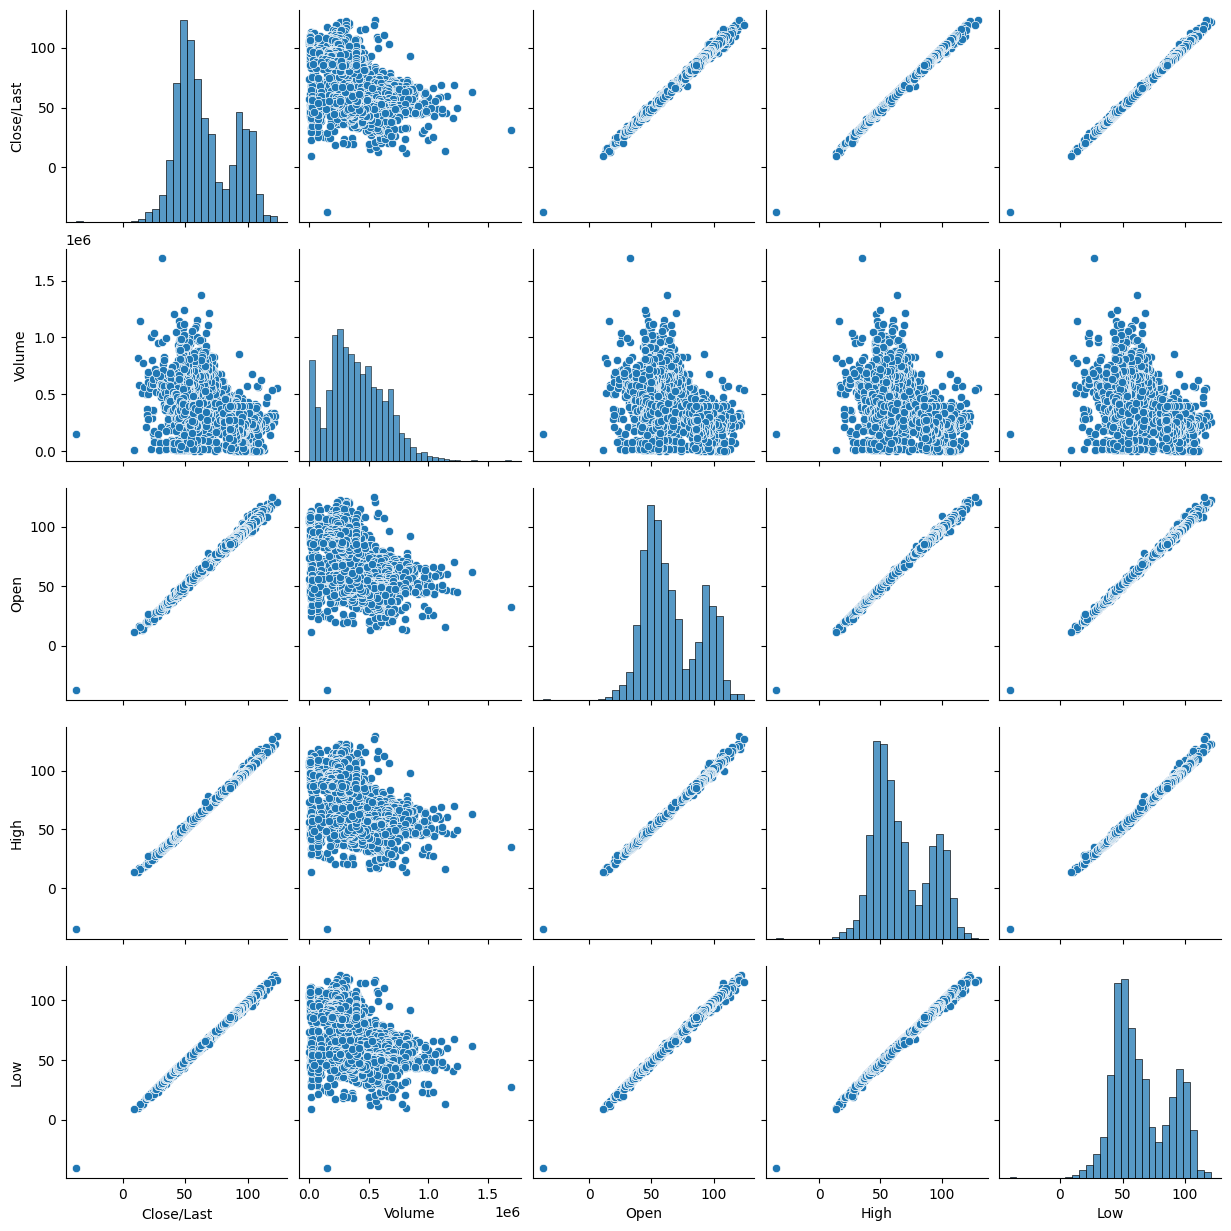

In [ ]:
import seaborn as sns
sns.pairplot(data)

Removing Outliers from the data:


We can see some outliers present in the data

Now we try to remove outliers from the data set

In [ ]:
# Calculate the interquartile range (IQR) for Close/Last Column
Q1 = data["Close/Last"] .quantile(0.25)
Q3 = data["Close/Last"] .quantile(0.75)
IQR_Close  = Q3 - Q1
limit_Close = 1.5*IQR_Close
print(limit_Close)
# Identify and remove outliers
data["Close/Last"] = data["Close/Last"][~((data["Close/Last"] < (Q1 - limit_Close)) | (data["Close/Last"] > (Q3 + limit_Close)))]
# Calculate the interquartile range (IQR) for Volume column
Q1 = data["Volume"] .quantile(0.25)
Q3 = data["Volume"] .quantile(0.75)
IQR_Volume  = Q3 - Q1
limit_Volume = 1.5*IQR_Volume
print(limit_Volume)
# Identify and remove outliers
data["Volume"] = data["Volume"][~((data["Volume"] < (Q1 - limit_Volume)) | (data["Volume"] > (Q3 + limit_Volume)))]
# Calculate the interquartile range (IQR) for Open column
Q1 = data["Open"] .quantile(0.25)
Q3 = data["Open"] .quantile(0.75)
IQR_Open  = Q3 - Q1
limit_Open = 1.5*IQR_Open
print(limit_Open)
# Identify and remove outliers
data["Open"] = data["Open"][~((data["Open"] < (Q1 - limit_Open)) | (data["Open"] > (Q3 + limit_Open)))]
# Calculate the interquartile range (IQR) for High column
Q1 = data["High"] .quantile(0.25)
Q3 = data["High"] .quantile(0.75)
IQR_High  = Q3 - Q1
limit_High = 1.5*IQR_High
print(limit_High)
# Identify and remove outliers
data["High"] = data["High"][~((data["High"] < (Q1 - limit_High)) | (data["High"] > (Q3 + limit_High)))]
# Calculate the interquartile range (IQR) for Low column
Q1 = data["Low"] .quantile(0.25)
Q3 = data["Low"] .quantile(0.75)
IQR_Low  = Q3 - Q1
limit_Low  = 1.5*IQR_Low
print(limit_Low )
# Identify and remove outliers
data["Low"] = data["Low"][~((data["Low"] < (Q1 - limit_Low)) | (data["Low"] > (Q3 + limit_Low)))]


58.27125000000001
495465.0
58.17750000000001
59.06624999999998
57.813750000000006


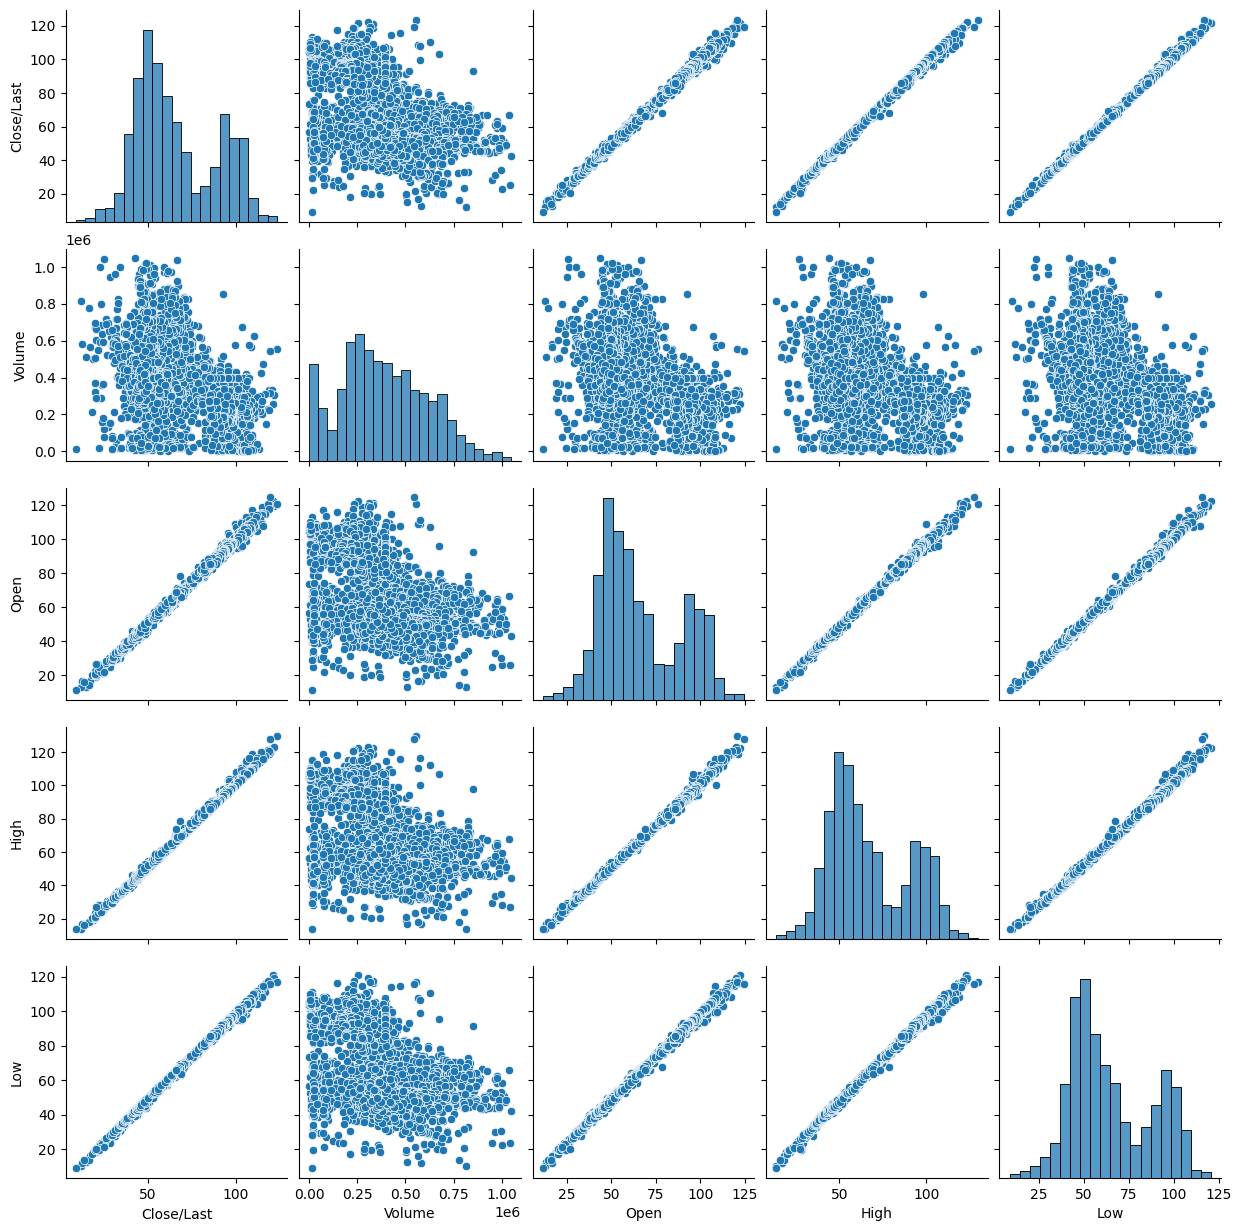

In [ ]:
sns.pairplot(data)

In [ ]:
data= data.dropna()

In [ ]:
data.skew()

<ipython-input-20-b3b431164adb>:1: FutureWarning: The default value of numeric_only in DataFrame.skew is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.skew()


Close/Last    0.420500
Volume        0.321591
Open          0.422666
High          0.443381
Low           0.402397
dtype: float64

In [ ]:
data.kurt()

<ipython-input-21-de7992f92dad>:1: FutureWarning: The default value of numeric_only in DataFrame.kurt is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.kurt()


Close/Last   -0.899999
Volume       -0.498205
Open         -0.902766
High         -0.894271
Low          -0.906081
dtype: float64

In [ ]:
correlation = data.corr()
correlation

<ipython-input-22-521f87fcc686>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = data.corr()


,Close/Last,Volume,Open,High,Low
Close/Last,1.000000,-0.412386,0.998202,0.999074,0.999214
Volume,-0.412386,1.000000,-0.410005,-0.406904,-0.414542
Open,0.998202,-0.410005,1.000000,0.999022,0.998816
High,0.999074,-0.406904,0.999022,1.000000,0.998516
Low,0.999214,-0.414542,0.998816,0.998516,1.000000


<Axes: >

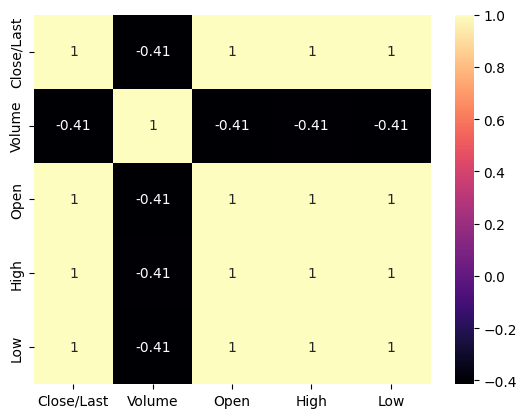

In [ ]:
sns.heatmap(correlation,xticklabels=correlation.columns,yticklabels=correlation.columns,annot=True,cmap='magma')

Distribution Plot For each Variable

<ipython-input-24-571cdfc7ec4f>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data["Close/Last"])


<Axes: xlabel='Close/Last', ylabel='Density'>

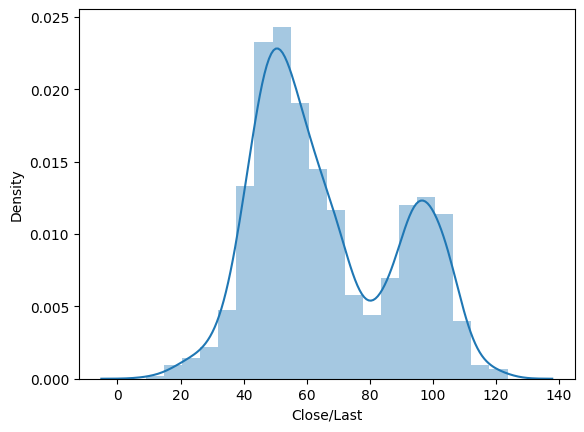

In [ ]:
sns.distplot(data["Close/Last"])

<ipython-input-25-2896601382ac>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data["Volume"])


<Axes: xlabel='Volume', ylabel='Density'>

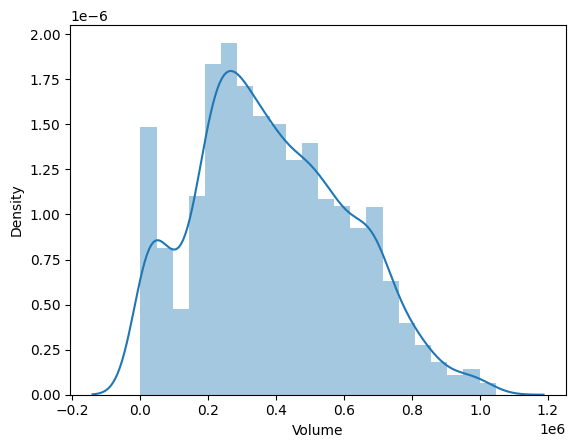

In [ ]:
sns.distplot(data["Volume"])

<ipython-input-26-daae21fed2ea>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data["Open"])


<Axes: xlabel='Open', ylabel='Density'>

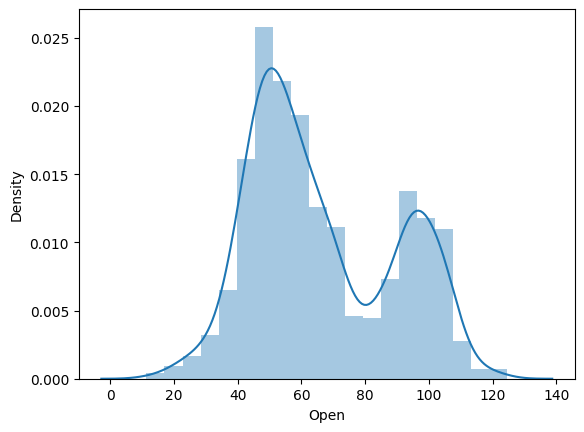

In [ ]:
sns.distplot(data["Open"])

<ipython-input-27-f105f0b633a7>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data["High"])


<Axes: xlabel='High', ylabel='Density'>

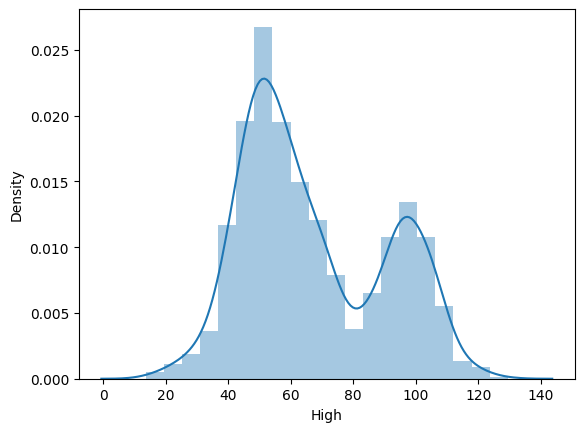

In [ ]:
sns.distplot(data["High"])

<ipython-input-28-93aae402e9ce>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data["Low"])


<Axes: xlabel='Low', ylabel='Density'>

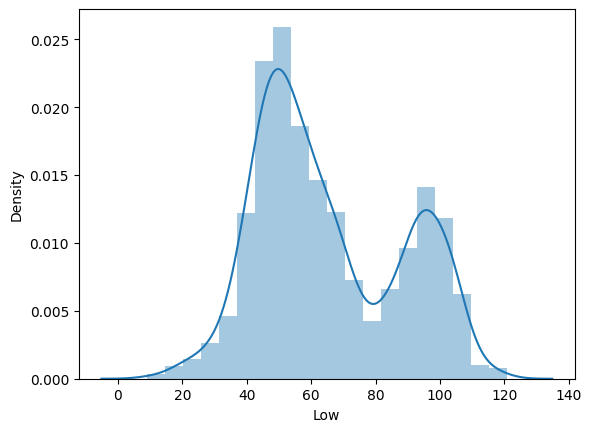

In [ ]:
sns.distplot(data["Low"])

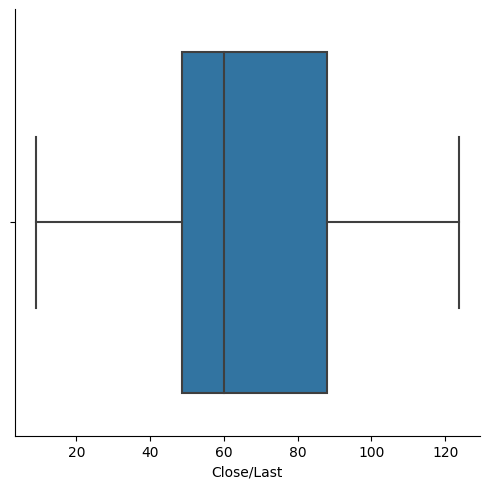

In [ ]:
sns.catplot(x="Close/Last",kind= "box",data= data)

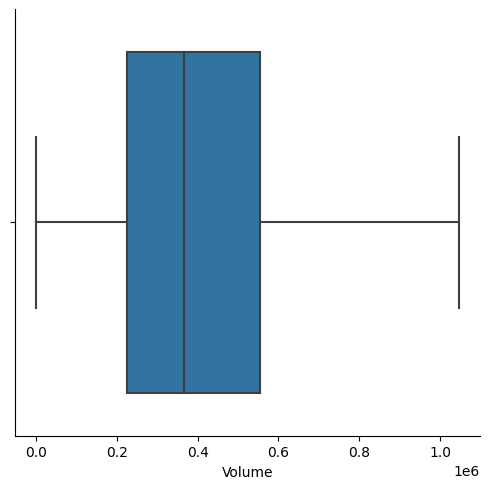

In [ ]:
sns.catplot(x="Volume",kind= "box",data= data)

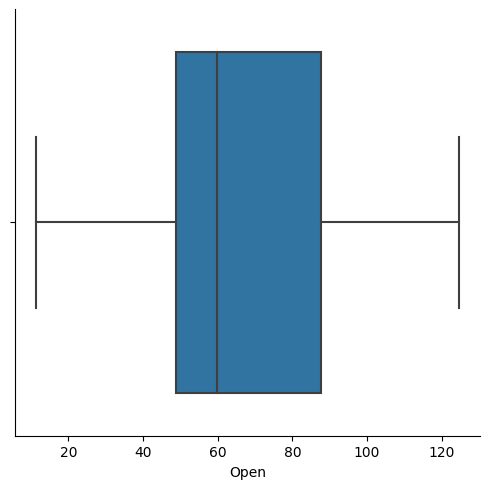

In [ ]:
sns.catplot(x="Open",kind= "box",data= data)

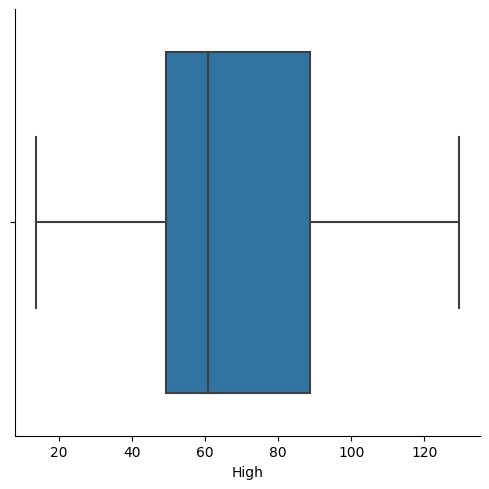

In [ ]:
sns.catplot(x="High",kind= "box",data= data)

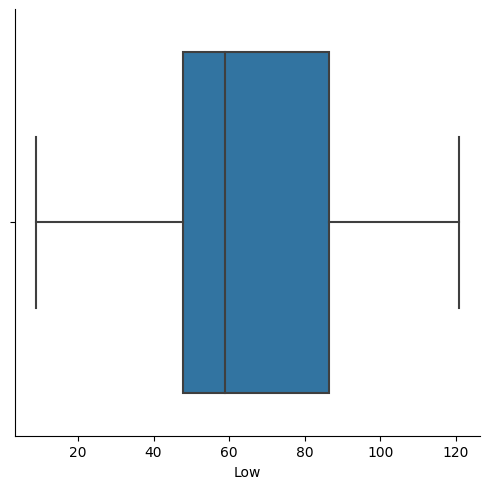

In [ ]:
sns.catplot(x="Low",kind= "box",data= data)

To understand trend in data we are going to us plotly

In [ ]:
import plotly.express as px

data_plot = data[['Date','Close/Last']].groupby(['Date']).sum().reset_index()
fig = px.line(data_plot, x="Date", y="Close/Last", title='Total Price by Date')
fig.show()

In [ ]:
import plotly.express as px

data_plot = data[['Date','Volume']].groupby(['Date']).sum().reset_index()
fig = px.line(data_plot, x="Date", y="Volume", title='Total Price by Date')
fig.show()

In [ ]:
import plotly.express as px

data_plot = data[['Date','Open']].groupby(['Date']).sum().reset_index()
fig = px.line(data_plot, x="Date", y="Open", title='Total Price by Date')
fig.show()

In [ ]:
import plotly.express as px

data_plot = data[['Date','High']].groupby(['Date']).sum().reset_index()
fig = px.line(data_plot, x="Date", y="High", title='Total Price by Date')
fig.show()

In [ ]:
import plotly.express as px

data_plot = data[['Date','Low']].groupby(['Date']).sum().reset_index()
fig = px.line(data_plot, x="Date", y="Low", title='Total Price by Date')
fig.show()

In [ ]:
SINGLE_YEAR = 2020

df_sales_single_year = data[data['Date'].dt.year == SINGLE_YEAR]
df_plot = df_sales_single_year[['Date','Volume']].groupby(['Date']).sum().reset_index()
fig = px.bar(df_plot, x='Date', y='Volume',facet_col_spacing=0, title=f'Total Sales by Day {SINGLE_YEAR}')
fig.update_layout(bargap=0.0,bargroupgap=0.0)
fig.show()

In [ ]:
SINGLE_YEAR = 2021

df_sales_single_year = data[data['Date'].dt.year == SINGLE_YEAR]
df_plot = df_sales_single_year[['Date','Volume']].groupby(['Date']).sum().reset_index()
fig = px.bar(df_plot, x='Date', y='Volume',facet_col_spacing=0, title=f'Total Sales by Day {SINGLE_YEAR}')
fig.update_layout(bargap=0.0,bargroupgap=0.0)
fig.show()

In [ ]:
SINGLE_YEAR = 2012

df_sales_single_year = data[data['Date'].dt.year == SINGLE_YEAR]
df_plot = df_sales_single_year[['Date','Volume']].groupby(['Date']).sum().reset_index()
fig = px.bar(df_plot, x='Date', y='Volume',facet_col_spacing=0, title=f'Total Sales by Day {SINGLE_YEAR}')
fig.update_layout(bargap=0.0,bargroupgap=0.0)
fig.show()

In [ ]:
SINGLE_YEAR = 2013

df_sales_single_year = data[data['Date'].dt.year == SINGLE_YEAR]
df_plot = df_sales_single_year[['Date','Volume']].groupby(['Date']).sum().reset_index()
fig = px.bar(df_plot, x='Date', y='Volume',facet_col_spacing=0, title=f'Total Sales by Day {SINGLE_YEAR}')
fig.update_layout(bargap=0.0,bargroupgap=0.0)
fig.show()

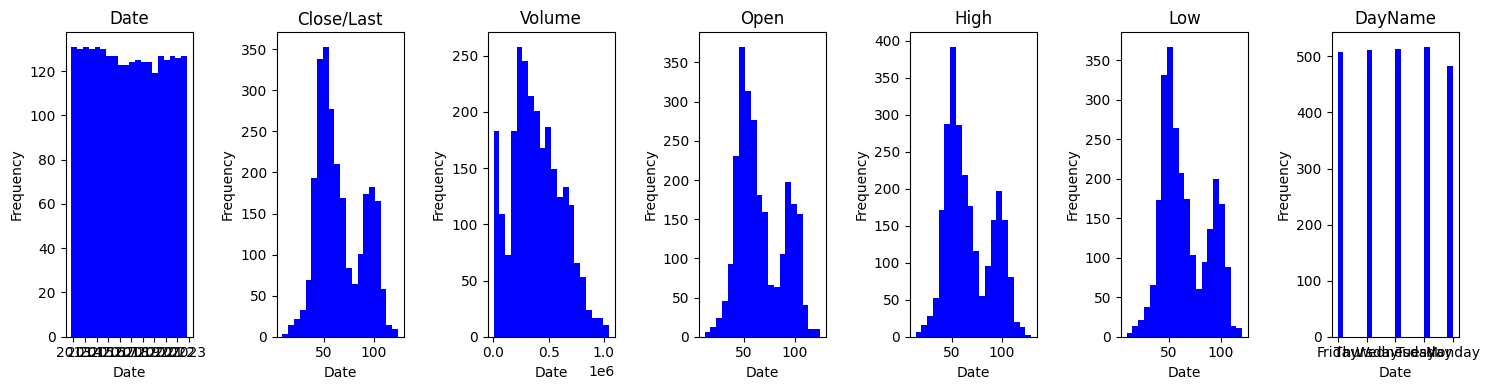

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=7, figsize=(15, 4))
# Plot histograms for each column
for i, column in enumerate(data.columns):
    axes[i].hist(data[column], bins=20, color='blue', alpha=1)
    axes[i].set_title(column)
    axes[i].set_xlabel('Date')
    axes[i].set_ylabel('Frequency')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

<Axes: >

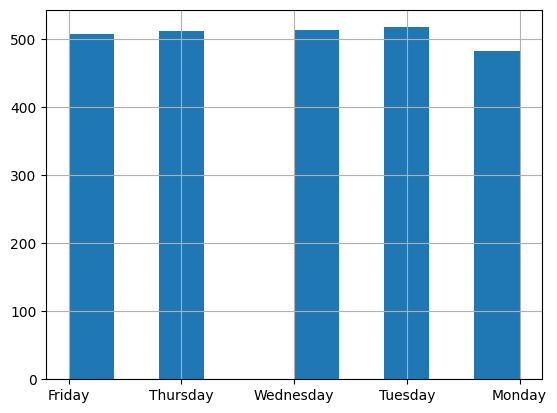

In [ ]:
data["DayName"].hist()

<Figure size 640x480 with 0 Axes>

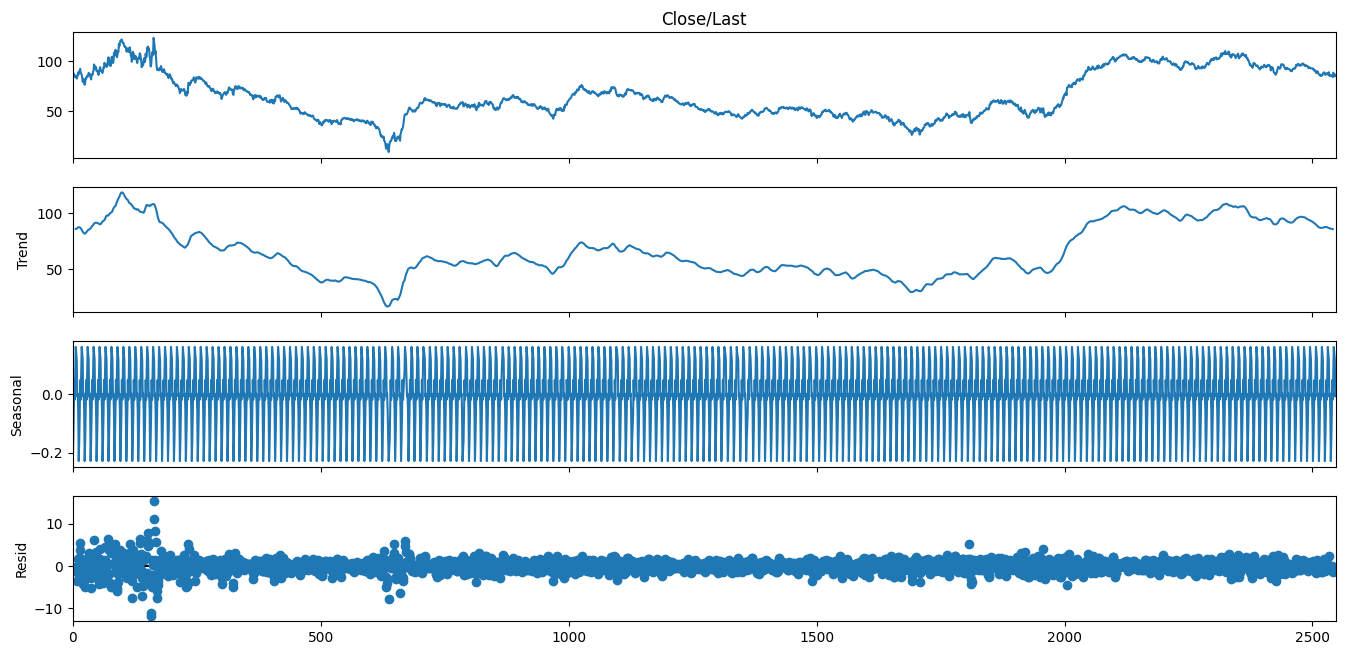

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(data["Close/Last"], model='additive', period=12)  # Seasonal Decomposition of Time Series
fig = plt.figure()
fig = decomposition.plot()
fig.set_size_inches(15, 7)
plt.show()


<Figure size 640x480 with 0 Axes>

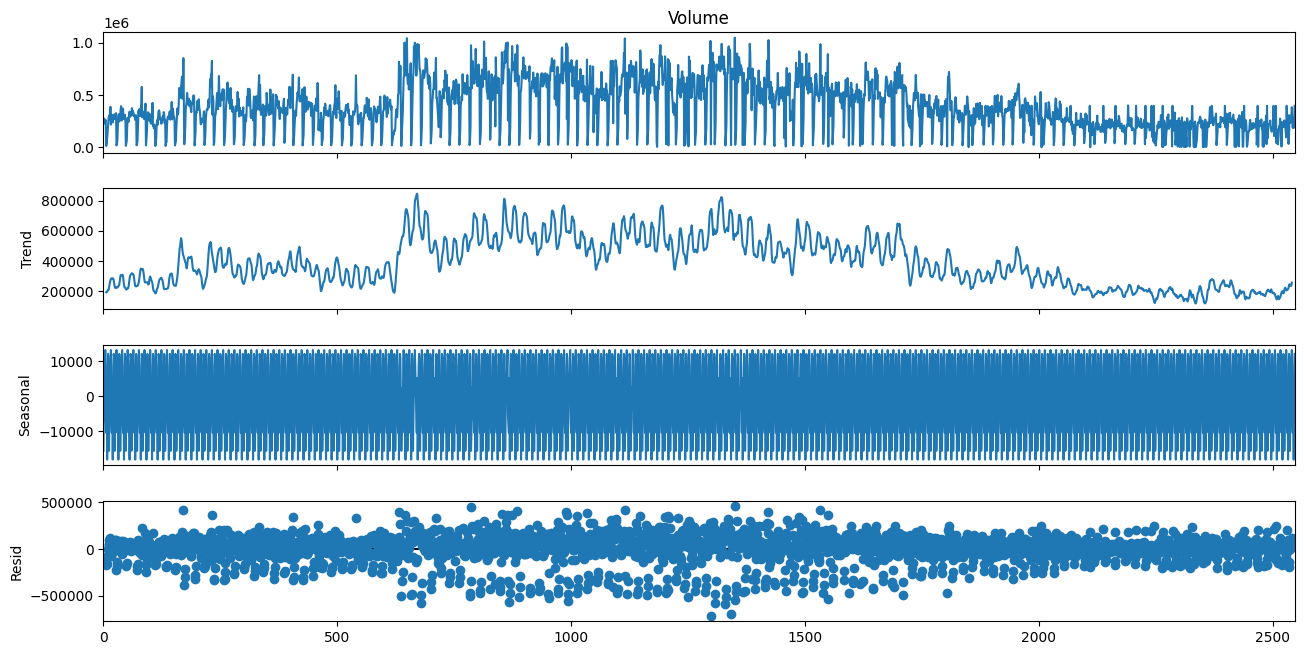

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(data["Volume"], model='additive', period=12)  # Seasonal Decomposition of Time Series
fig = plt.figure()
fig = decomposition.plot()
fig.set_size_inches(15, 7)
plt.show()


<Figure size 640x480 with 0 Axes>

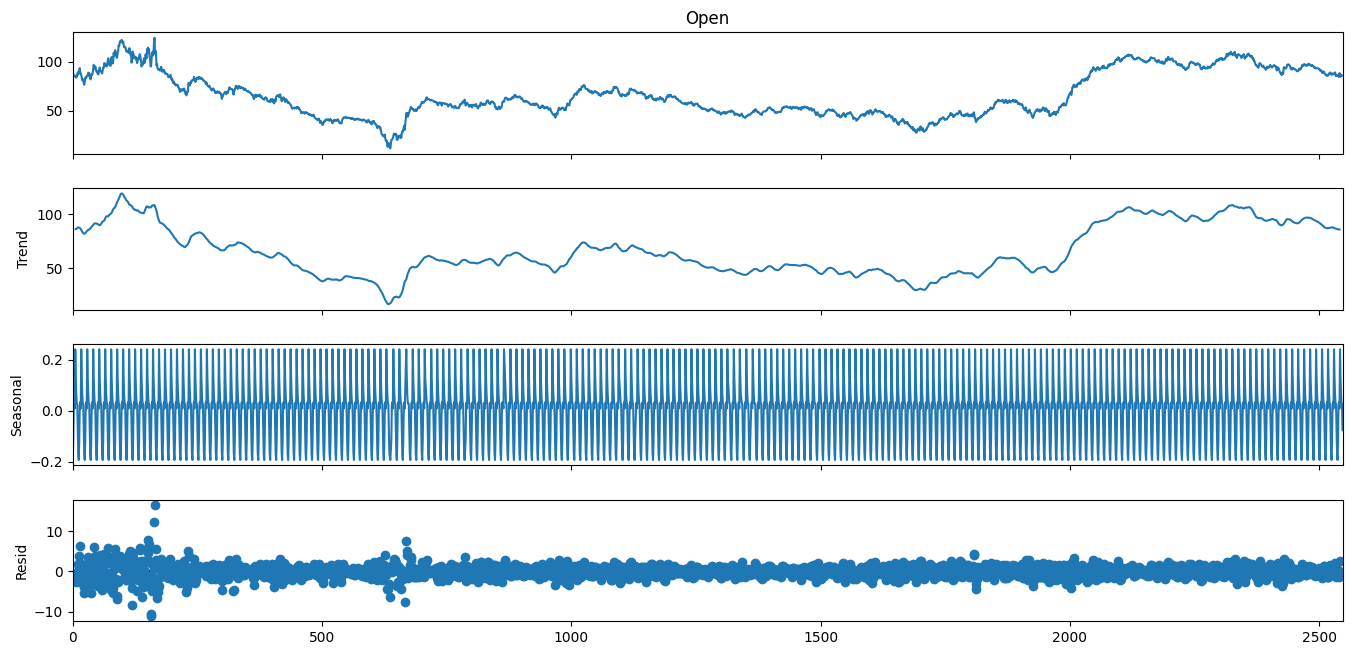

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(data["Open"], model='additive', period=12)  # Seasonal Decomposition of Time Series
fig = plt.figure()
fig = decomposition.plot()
fig.set_size_inches(15, 7)
plt.show()


<Figure size 640x480 with 0 Axes>

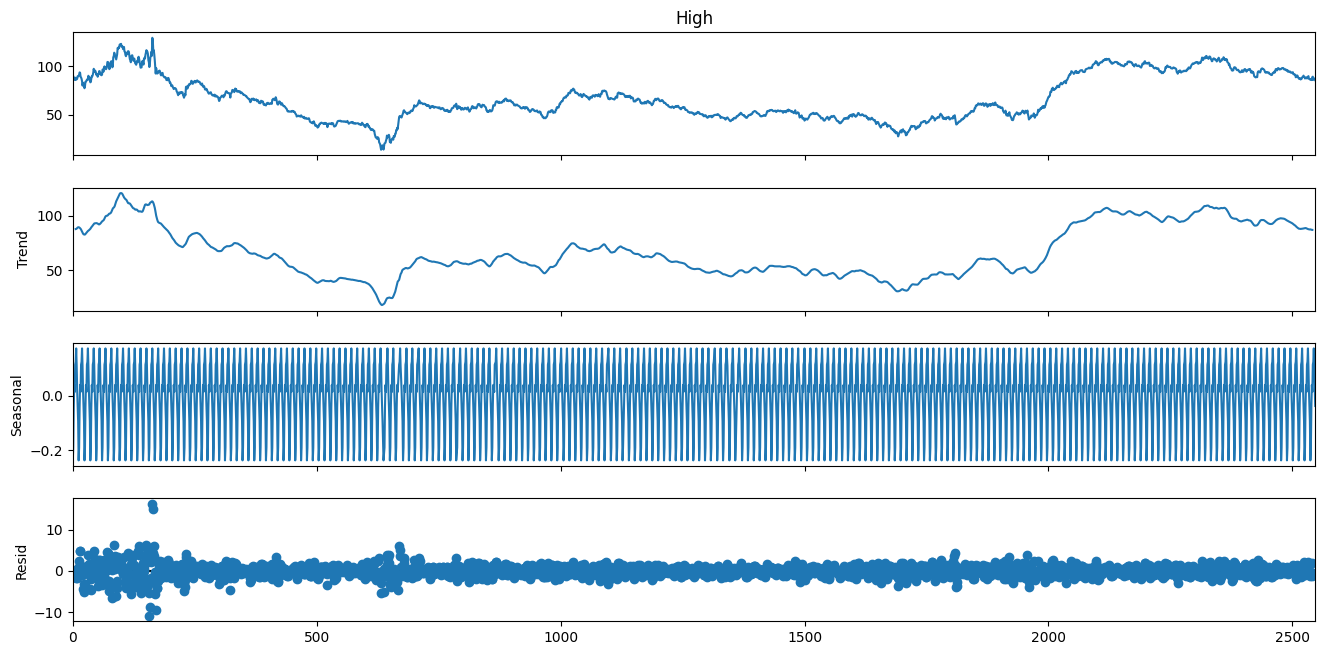

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(data["High"], model='additive', period=12)  # Seasonal Decomposition of Time Series
fig = plt.figure()
fig = decomposition.plot()
fig.set_size_inches(15, 7)
plt.show()


<Figure size 640x480 with 0 Axes>

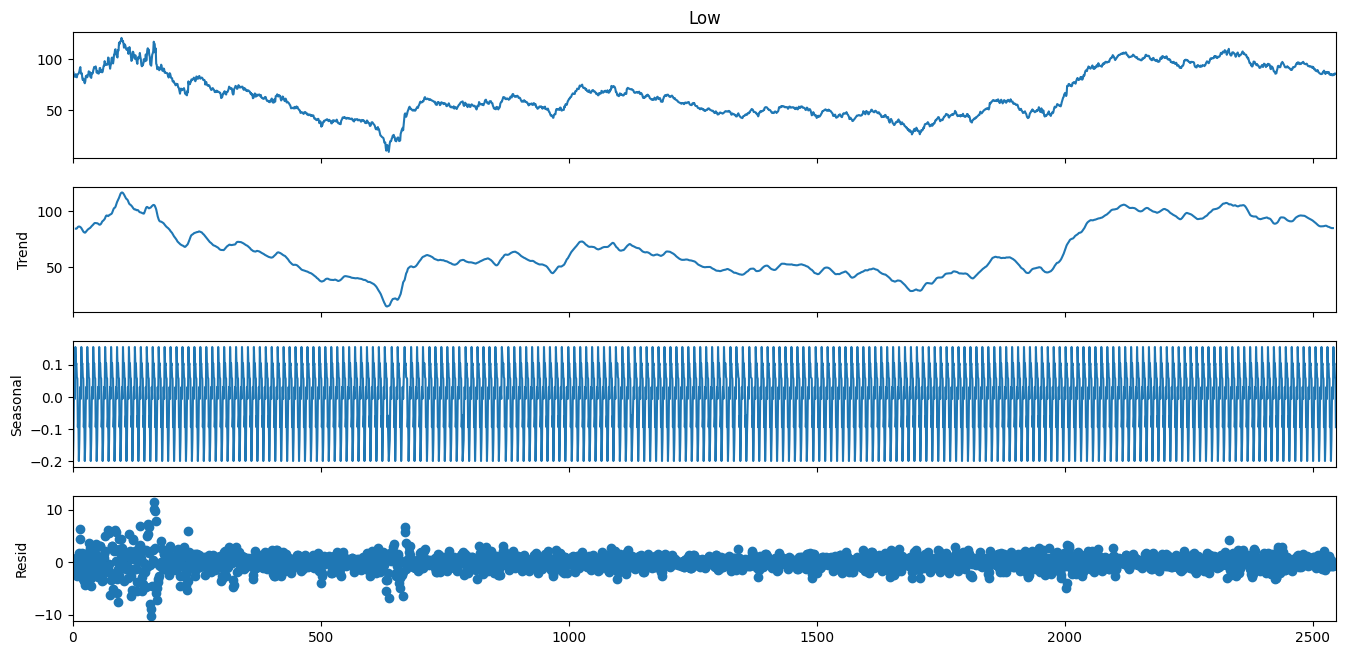

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(data["Low"], model='additive', period=12)  # Seasonal Decomposition of Time Series
fig = plt.figure()
fig = decomposition.plot()
fig.set_size_inches(15, 7)
plt.show()


<ipython-input-50-886c9d130d41>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



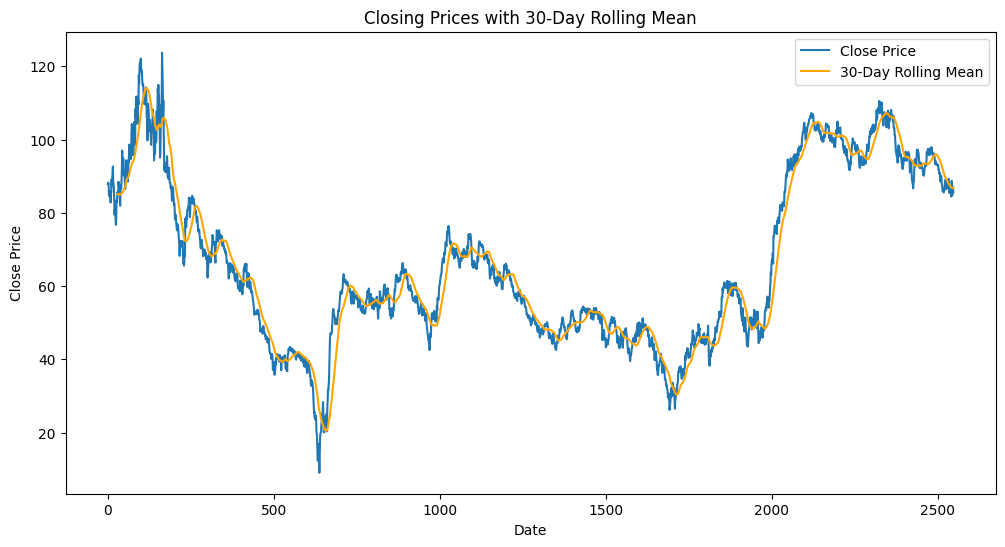

In [ ]:
# Rolling average for closing prices
data['Rolling Mean'] = data['Close/Last'].rolling(window=30).mean()

# Visualizing rolling average
plt.figure(figsize=(12, 6))
plt.plot(data['Close/Last'], label='Close Price')
plt.plot(data['Rolling Mean'], label='30-Day Rolling Mean', color='orange')
plt.title('Closing Prices with 30-Day Rolling Mean')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()

<ipython-input-51-b5c39fc984c7>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



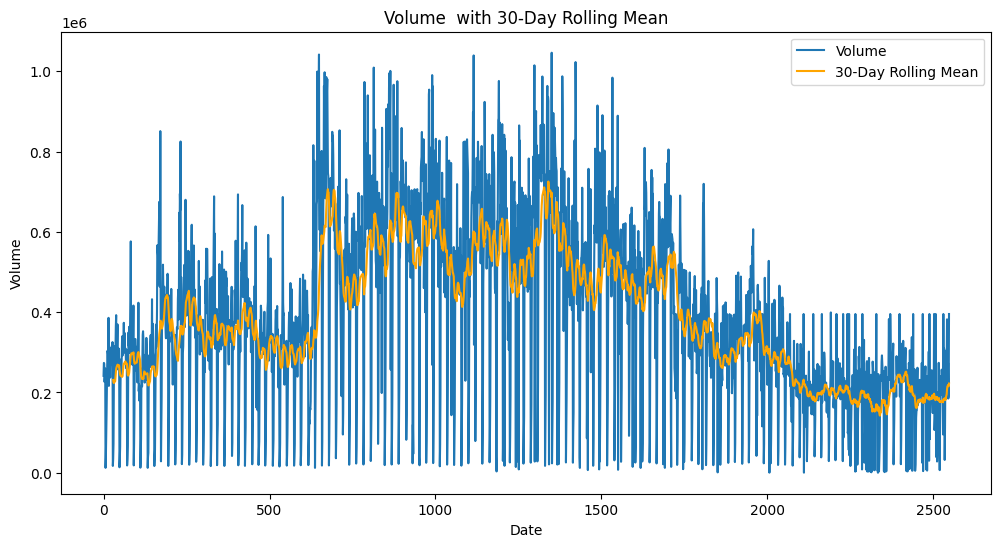

In [ ]:
# Rolling average for closing prices
data['Rolling Mean'] = data['Volume'].rolling(window=30).mean()

# Visualizing rolling average
plt.figure(figsize=(12, 6))
plt.plot(data['Volume'], label='Volume')
plt.plot(data['Rolling Mean'], label='30-Day Rolling Mean', color='orange')
plt.title('Volume  with 30-Day Rolling Mean')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.legend()
plt.show()

<ipython-input-52-ca2eaa951c33>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



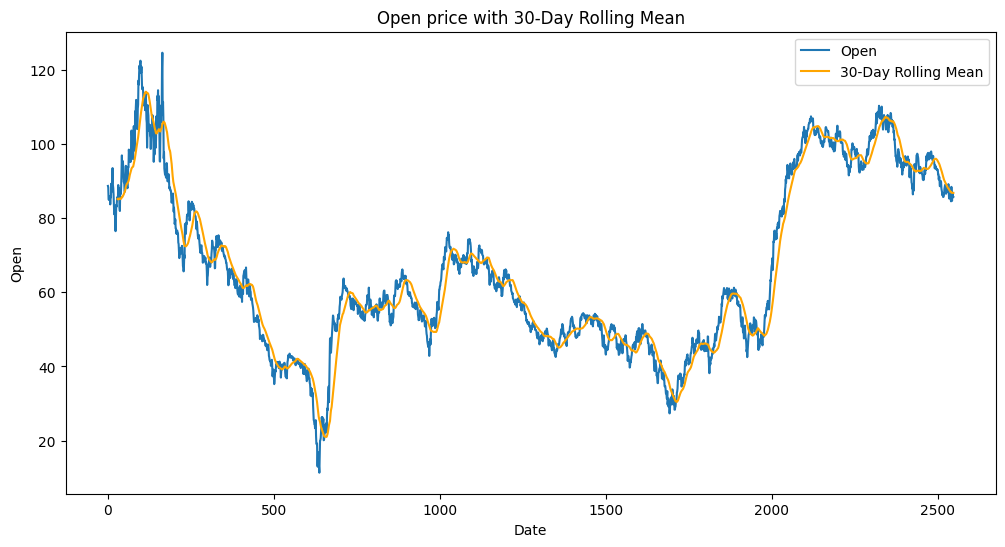

In [ ]:
# Rolling average for closing prices
data['Rolling Mean'] = data['Open'].rolling(window=30).mean()

# Visualizing rolling average
plt.figure(figsize=(12, 6))
plt.plot(data['Open'], label='Open')
plt.plot(data['Rolling Mean'], label='30-Day Rolling Mean', color='orange')
plt.title('Open price with 30-Day Rolling Mean')
plt.xlabel('Date')
plt.ylabel('Open')
plt.legend()
plt.show()

<ipython-input-53-b8e407b8aa4d>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



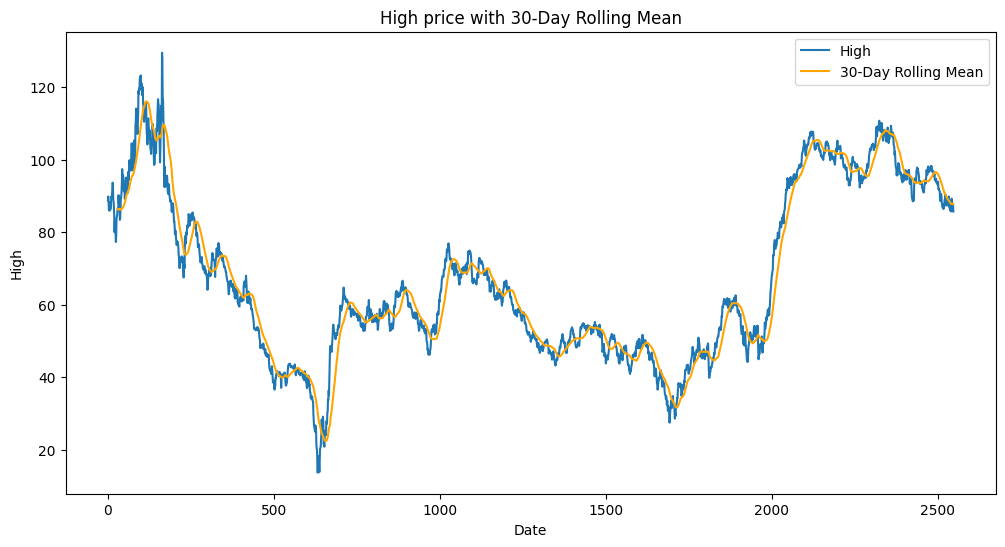

In [ ]:
# Rolling average for closing prices
data['Rolling Mean'] = data['High'].rolling(window=30).mean()

# Visualizing rolling average
plt.figure(figsize=(12, 6))
plt.plot(data['High'], label='High')
plt.plot(data['Rolling Mean'], label='30-Day Rolling Mean', color='orange')
plt.title('High price with 30-Day Rolling Mean')
plt.xlabel('Date')
plt.ylabel('High')
plt.legend()
plt.show()

<ipython-input-54-4b9c98ca63c1>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



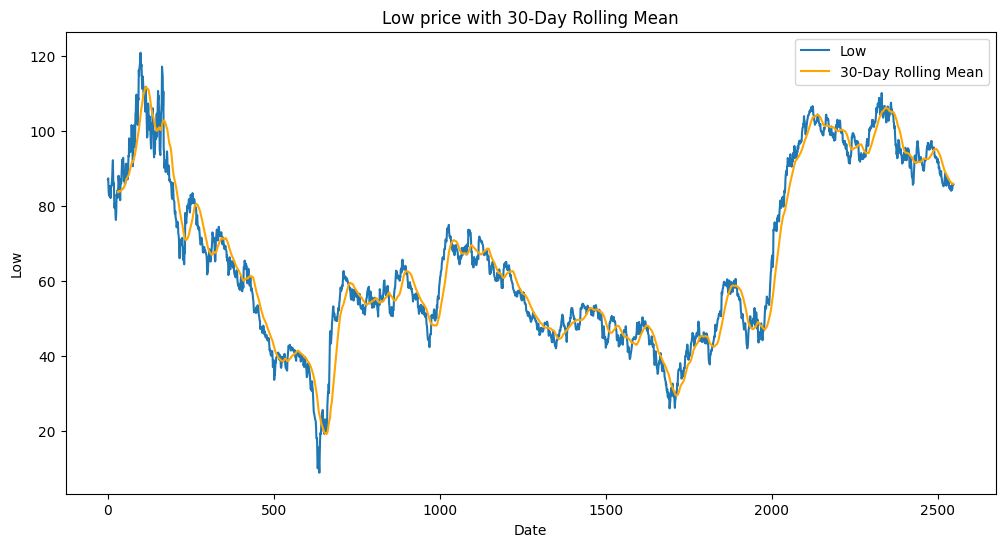

In [ ]:
# Rolling average for closing prices
data['Rolling Mean'] = data['Low'].rolling(window=30).mean()

# Visualizing rolling average
plt.figure(figsize=(12, 6))
plt.plot(data['Low'], label='Low')
plt.plot(data['Rolling Mean'], label='30-Day Rolling Mean', color='orange')
plt.title('Low price with 30-Day Rolling Mean')
plt.xlabel('Date')
plt.ylabel('Low')
plt.legend()
plt.show()

# Stationarity of the data using Differencing,  Log Transformation, Seasonal Differencing

In [ ]:
# making the data Stationary
# Method 1: Differencing
data['Price_Diff'] = data['Close/Last'] - data['Close/Last'].shift(5)
data['Price_Diff'].dropna(inplace=True)

In [ ]:
# Method 2: Log Transformation
data['Price_Log'] = np.log(data['Close/Last'])
data['Price_Log_Diff'] = data['Price_Log'] - data['Price_Log'].shift(5)
data['Price_Log_Diff'].dropna(inplace=True)

In [ ]:
# Method 3: Seasonal Differencing (if seasonality is present)
data['Price_Seasonal_Diff'] = data['Close/Last'] - data['Close/Last'].shift(20)  # Assuming a seasonality of 30 days
data['Price_Seasonal_Diff'].dropna(inplace=True)


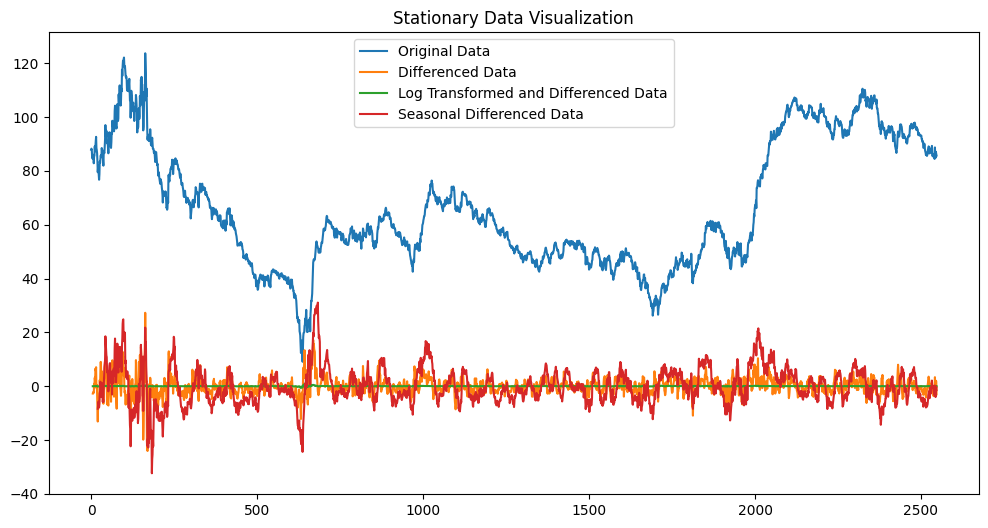

In [ ]:

# Plot the original and differenced data for visualization
plt.figure(figsize=(12, 6))
plt.plot(data['Close/Last'], label='Original Data')
plt.plot(data['Price_Diff'], label='Differenced Data')
plt.plot(data['Price_Log_Diff'], label='Log Transformed and Differenced Data')
plt.plot(data['Price_Seasonal_Diff'], label='Seasonal Differenced Data')
plt.legend()
plt.title('Stationary Data Visualization')
plt.show()

In [ ]:
data.isnull().sum()
data.dropna(inplace=True)
data.isnull().sum()

Date                   0
Close/Last             0
Volume                 0
Open                   0
High                   0
Low                    0
DayName                0
Rolling Mean           0
Price_Diff             0
Price_Log              0
Price_Log_Diff         0
Price_Seasonal_Diff    0
dtype: int64

Checking the stationarity of data using Dickey-Fuller Test with the help of p-value

If p-value <= 0.05 then the data is Stationary

In [ ]:
from statsmodels.tsa.stattools import adfuller

# ADF test for differenced data
result_diff = adfuller(data['Price_Diff'])

# ADF test for log-transformed and differenced data
result_log_diff = adfuller(data['Price_Log_Diff'])

# ADF test for seasonal differenced data
result_seasonal_diff = adfuller(data['Price_Seasonal_Diff'])

# Print the p-values and determine stationarity
print(f'ADF Test for Differenced Data - p-value: {result_diff[1]}')
print(f'ADF Test for Log-Transformed and Differenced Data - p-value: {result_log_diff[1]}')
print(f'ADF Test for Seasonal Differenced Data - p-value: {result_seasonal_diff[1]}')


ADF Test for Differenced Data - p-value: 2.6377035340337603e-11
ADF Test for Log-Transformed and Differenced Data - p-value: 1.6657507776128016e-11
ADF Test for Seasonal Differenced Data - p-value: 1.222772745437538e-07


Since p-value is less than 0.05 we can say that the data is transformed into stationary form

Model Fitting

Based on Metrics like RMSE And R_Square it is drawn that the quarterly seasonal Arima oios the best fit for the given data

In [ ]:
df = pd.read_csv('Crude oil.csv')

In [ ]:
# Drop specified columns
columns_to_drop = ['Volume', 'Open', 'Low', 'High']
df = df.drop(columns=columns_to_drop)

# Display the DataFrame after dropping columns
print(df)

            Date  Close/Last
0     10/28/2022       87.90
1     10/27/2022       88.26
2     10/26/2022       87.91
3     10/25/2022       85.32
4     10/24/2022       84.58
...          ...         ...
2543  11-05-2012       85.65
2544  11-02-2012       84.86
2545  11-01-2012       87.09
2546  10/31/2012       86.24
2547  10/30/2012       85.68

[2548 rows x 2 columns]


In [ ]:
null_values_total = df.isnull().sum()
print(null_values_total)

Date          0
Close/Last    0
dtype: int64


In [ ]:
# Convert 'Date' column to datetime
df['Date'] = pd.to_datetime(df['Date'])

# Display the DataFrame with the 'Date' column as datetime
print(df)

           Date  Close/Last
0    2022-10-28       87.90
1    2022-10-27       88.26
2    2022-10-26       87.91
3    2022-10-25       85.32
4    2022-10-24       84.58
...         ...         ...
2543 2012-11-05       85.65
2544 2012-11-02       84.86
2545 2012-11-01       87.09
2546 2012-10-31       86.24
2547 2012-10-30       85.68

[2548 rows x 2 columns]


Spliting the data

In [ ]:
train_size = int(len(df) * 0.8)
train, test = df[0:train_size], df[train_size:]

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error
from math import sqrt

In [ ]:
# ARIMA Model
import warnings
from pandas import read_csv
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt

In [ ]:
order = (1, 1, 0)
seasonal_order = (1, 1, 1, 4)
model = SARIMAX(train['Close/Last'], order=order, seasonal_order=seasonal_order)
model_fit = model.fit(disp=False)

In [ ]:
start_date = test.index[0]
end_date = test.index[-1]
predictions = model_fit.predict(start=start_date, end=end_date, dynamic=False)
rmse_Arima = sqrt(mean_squared_error(test['Close/Last'], predictions))
print(f'RMSE: {rmse_Arima}')

RMSE: 11.410134619035919


In [ ]:
forecast = model_fit.forecast(steps=len(test))
forecast

2038     81.822956
2039     81.913174
2040     81.937121
2041     82.046597
2042     82.018010
           ...    
2543    106.568580
2544    106.590552
2545    106.700107
2546    106.671502
2547    106.764243
Name: predicted_mean, Length: 510, dtype: float64

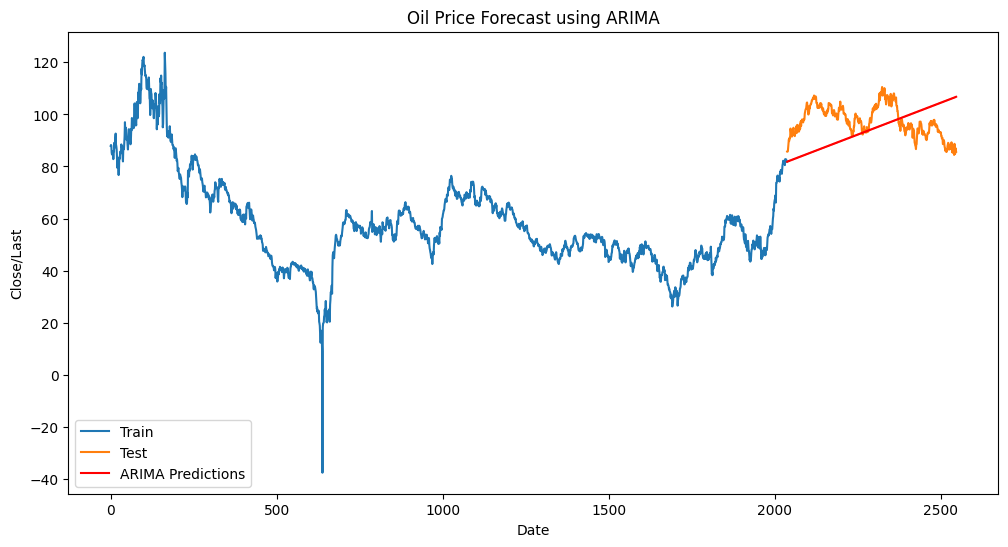

In [ ]:
import matplotlib.pyplot as plt
# Plotting ARIMA predictions
plt.figure(figsize=(12, 6))
plt.plot(train.index, train['Close/Last'], label='Train')
plt.plot(test.index, test['Close/Last'], label='Test')
plt.plot(test.index, forecast, label='ARIMA Predictions', color='red')  # Use the forecast values from ARIMA
plt.title('Oil Price Forecast using ARIMA')
plt.xlabel('Date')
plt.ylabel('Close/Last')
plt.legend()
plt.show()